In [8]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self, z_dim, channel_img, feature_g):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            # Input: N x z_dim x 1 x 1
            self._block(z_dim, feature_g*16, kernel_size=4, stride=1, padding=0), # N x feature_g*16 x 4 x 4
            self._block(feature_g*16, feature_g*8, kernel_size=4, stride=2, padding=1), # 8 x 8
            self._block(feature_g*8, feature_g*4, kernel_size=4, stride=2, padding=1), # 16 x 16
            self._block(feature_g*4, feature_g*2, kernel_size=4, stride=2, padding=1), # 32 x 32
            nn.ConvTranspose2d( # for input to the discriminator, 64 x 64
                feature_g*2,
                channel_img,
                kernel_size=4,
                stride=2,
                padding=1
            ),
            nn.Tanh() # good for image generation output ranges: [-1, 1]
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(), # why ReLU? because based on paper
        )
    
    def forward(self, x):
        return self.net(x)

In [11]:
BATCH_SIZE = 64
Z_DIM = 100
CHANNEL_IMG = 1
FEATURE_G = 64

generator = Generator(Z_DIM, CHANNEL_IMG, FEATURE_G)
generator.load_state_dict(torch.load('generator.pth'))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


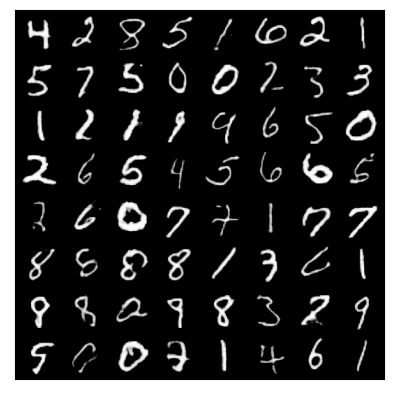

In [37]:
def show_image_grid(images: torch.Tensor, ncol: int):
    image_grid = torchvision.utils.make_grid(images, ncol)     # Make images into a grid
    image_grid = image_grid.permute(1, 2, 0) # Move channel to the last
    image_grid = image_grid.numpy()    # Convert into Numpy

    plt.imshow(image_grid)
    plt.xticks([])
    plt.yticks([])
    plt.show()

NOISE = torch.randn((BATCH_SIZE, Z_DIM, 1, 1))
generated_images = generator(NOISE)
show_image_grid(generated_images, ncol=8)